In [0]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [0]:
!tar -xzf aclImdb_v1.tar.gz

In [0]:
from os import walk
import re
train_negatives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/train/neg"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/train/neg/" + f).read())
      train_negatives.append(text)

In [0]:
train_positives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/train/pos"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/train/pos/" + f).read())
      train_positives.append(text)

In [5]:
train_data = train_negatives + train_positives
print(train_data[0])

This is the absolutely worst piece of crap I've ever had to watch - actually it was so bad that I just HAD to watch it :-)The CGI is sooo bad it's fun! It's not even close to the shitty CGI animations in Spawn, that's how bad it is, har har har...I'm amazed over the fact that some distribution company actually has put money down to release this on DVD, but I guess they'll get more money out of it that way, 'cos the cost of making it can not have been more than a few hundred dollars.It's so awful that a kindergarten class could have made it.See it and laugh!


In [6]:
test_negatives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/test/neg"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/test/neg/" + f).read())
      test_negatives.append(text)
test_positives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/test/pos"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/test/pos/" + f).read())
      test_positives.append(text)
test_data = test_negatives + test_positives
len(test_data)

25000

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data)
X_train_counts.shape
X_test = count_vect.transform(test_data)

In [0]:
classes = [0] * 12500 + [1] * 12500

In [0]:
class Metrics:
  def __init__(self):
    self.set_initial()
  def set_initial(self):
    self.tp = 0
    self.tn = 0
    self.fn = 0
    self.fp = 0
  def fit(self, predicted, real):
    self.set_initial()
    for i in range(len(predicted)):
      p = predicted[i]
      r = real[i]
      if p == 1:
        if p == r:
          self.tp += 1
        else:
          self.fn += 1
      else:
        if p == r:
          self.tn += 1
        else:
          self.fp += 1
  def acc(self):
    return (self.tp + self.tn)/(self.tp + self.tn + self.fp + self.fn)
  def prec(self):
    return self.tp/(self.tp + self.fp)
  def rec(self):
    return self.tp/(self.tp + self.fn)
  def f1(self):
    return 2 * self.prec() * self.rec() / (self.prec() + self.rec())

#Multinomial naive Bayes classifier

In [0]:
from sklearn.naive_bayes import MultinomialNB
multi_clf = MultinomialNB().fit(X_train_counts, classes)

In [0]:
multi_predicted = multi_clf.predict(X_test)
multi_predicted_proba = multi_clf.predict_proba(X_test)

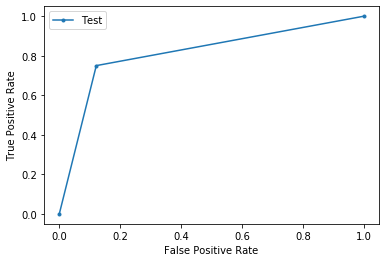

acc: 0.81432
True
f1: 0.8016069749551245
True
p: 0.75024
True
r: 0.8605248669480638
True
roc auc score: 0.8143199999999999


In [12]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
m = Metrics()
m.fit(multi_predicted, classes)
acc = accuracy_score(multi_predicted, classes)
f1 = f1_score(multi_predicted, classes)
p = precision_score(multi_predicted, classes)
r = recall_score(multi_predicted, classes)

fpr, tpr, _ = roc_curve(classes, multi_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print("acc: " + str(acc))
print(m.acc() == acc)
print("f1: " + str(f1))
print(m.f1() == f1)
print("p: " + str(p))
print(m.prec() == p)
print("r: " + str(r))
print(m.rec() == r)
print("roc auc score: " + str(roc_auc_score(classes, multi_predicted)))

In [0]:
def get_top_indexes(proba, best, count):
  take = 0
  if best:
    take = 1
  p = {i:proba[i][1] for i in range(len(proba))}
  return sorted(p.items(), key=lambda x: x[take], reverse=True)[:count]

def get_top(indexes):
  return [test_data[i[0]] for i in indexes]

In [14]:
indexes = get_top_indexes(multi_predicted_proba, True, 15)
get_top(indexes)

['Academy Awarding actor Sidney Poitier of "Lilies of the Field" reprises his role as Lieutenant Virgil Tibbs from the 1967 Oscar winning Best Picture "In the Heat of the Night" for veteran director Gordon Douglas\' tired, uninspired sequel "They Call Me MISTER Tibbs," with nobody the equivalent of Rod Steiger with which to swap dialogue. Clearly, both "Bullitt" scenarist Alan R. Trustman and Robert D. Webb of "Cape Fear" were off their game when they penned this predictable police procedural potboiler. The dialogue is drab and none of the characters are interesting, not even the chief suspect. Absolutely nothing remotely exciting, suspenseful, or surprising occurs in this tame whodunit. Meanwhile, things have changed considerably since Virgil was last seen in "In the Heat of the Night." He worked as a homicide detective for the Philadelphia, Pennsylvania, Police Department. In "They Call Me MISTER Tibbs," our hero works for the San Francisco Police Department. Moreover, he has a wife,

In [15]:
indexes = get_top_indexes(multi_predicted_proba, False, 15)
get_top(indexes)

["As much as I like Walter Matthau, I felt that the majority of his roles were tailored towards his personality. This role is one of the exceptions. He plays a dentist who is both charming and dishonest. This role does require much more acting than in most of his other roles. I liked the fact that the movie was honest about how a professional can be dishonest in order to avoid commitment in a relationship. His whole aim was to find a way to be in a relationship with a much younger woman, but not to be committed in any way. The alibi - using his secretary (Ingrid Bergman) to pretend to be his wife. At some point in the movie, the pretend Mr. and Mrs. actually are deluded into believing that they were actually really married. The ending was good, because a middle aged man found that pursuing someone in his own age group was more worthwhile. The movie was funny, entertaining, and didn't sell out by being preachy.",
 "I really don't have any complaints about this movie, except for the dist

#MaxEnt

In [16]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression().fit(X_train_counts, classes)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
lr_predicted = lr_clf.predict(X_test)
lr_predicted_proba = lr_clf.predict_proba(X_test)

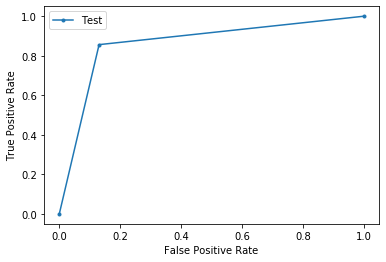

acc: 0.86284
True
f1: 0.8619509642095092
True
p: 0.8564
True
r: 0.8675743577275306
True
roc auc score: 0.86284


In [18]:
m = Metrics()
m.fit(lr_predicted, classes)
acc = accuracy_score(lr_predicted, classes)
f1 = f1_score(lr_predicted, classes)
p = precision_score(lr_predicted, classes)
r = recall_score(lr_predicted, classes)

fpr, tpr, _ = roc_curve(classes, lr_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print("acc: " + str(acc))
print(m.acc() == acc)
print("f1: " + str(f1))
print(m.f1() == f1)
print("p: " + str(p))
print(m.prec() == p)
print("r: " + str(r))
print(m.rec() == r)
print("roc auc score: " + str(roc_auc_score(classes, lr_predicted)))

In [19]:
indexes = get_top_indexes(lr_predicted_proba, True, 15)
get_top(indexes)

['1904. The North African nation of Morocco is hanging onto a tenuous Independence, as the various European powers - France, Germany, Britain, Russia, Spain, and now the United States - are vying for influence in the region. The Sultan (Marc Zuber) is a weak puppet; his uncle, the Bashaw (Vladek Sheybal), who is being manipulated by the French and Germans, is the real power behind the throne. Enter Berber Chieftan Raisuli (Sean Connery), the leader of the Rif tribe and "the last of the Barbary Pirates", who kidnaps an American missionary, Eden Pedecaris (Candice Bergen) and her two children and takes them hostage. Back in the US, President Theodore Roosevelt (Brian Keith) threatens to go to war over the issue: "Pedecaris Alive or Raisuli Dead!" - seeing the issue as the perfect way to exercise his "Big Stick" diplomacy, though Secretary of State John Hay (John Huston) is not so confident. However, the Raisuli has less sinister plans for the Pedecarises, who are more than capable of han

In [20]:
indexes = get_top_indexes(lr_predicted_proba, False, 15)
get_top(indexes)

["As much as I like Walter Matthau, I felt that the majority of his roles were tailored towards his personality. This role is one of the exceptions. He plays a dentist who is both charming and dishonest. This role does require much more acting than in most of his other roles. I liked the fact that the movie was honest about how a professional can be dishonest in order to avoid commitment in a relationship. His whole aim was to find a way to be in a relationship with a much younger woman, but not to be committed in any way. The alibi - using his secretary (Ingrid Bergman) to pretend to be his wife. At some point in the movie, the pretend Mr. and Mrs. actually are deluded into believing that they were actually really married. The ending was good, because a middle aged man found that pursuing someone in his own age group was more worthwhile. The movie was funny, entertaining, and didn't sell out by being preachy.",
 "I really don't have any complaints about this movie, except for the dist

#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(X_train_counts, classes)

In [0]:
dt_predicted = dt_clf.predict(X_test)
dt_predicted_proba = dt_clf.predict_proba(X_test)

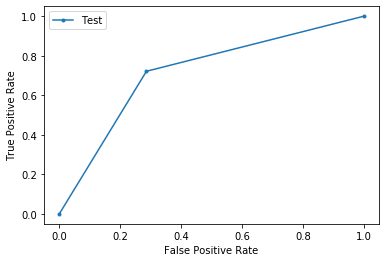

acc: 0.71764
True
f1: 0.7187761443767181
True
p: 0.72168
True
r: 0.7158955638441393
True
roc auc score: 0.7176400000000001


In [23]:
m = Metrics()
m.fit(dt_predicted, classes)
acc = accuracy_score(dt_predicted, classes)
f1 = f1_score(dt_predicted, classes)
p = precision_score(dt_predicted, classes)
r = recall_score(dt_predicted, classes)

fpr, tpr, _ = roc_curve(classes, dt_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print("acc: " + str(acc))
print(m.acc() == acc)
print("f1: " + str(f1))
print(m.f1() == f1)
print("p: " + str(p))
print(m.prec() == p)
print("r: " + str(r))
print(m.rec() == r)
print("roc auc score: " + str(roc_auc_score(classes, dt_predicted)))

In [24]:
indexes = get_top_indexes(dt_predicted_proba, True, 15)
get_top(indexes)

["Deformed, aged female scientist kills fellow scientist in order to steal formulae for rejuvenating cells and reversing the aging process. She takes it and turns into the beautiful, evil Satanik (Magda Konopka) who goes around, seducing and murdering wealthy businessmen.She dresses very stylishly in late-60s mod clothes and manipulates those around her, looking a lot like the late Marisa Mell from the DIABOLIK film. Coincidence??However, in spite of all this, it's amateurish and sloppy without the James Bond pop-art gadgetry that DIABOLIK had had. Even the Madrid and Lake Geneva filming locations don't make up for this.The soundtrack is by Manuel Parada & Roberto Pregadio and it isn't bad at all, consisting of lush orchestration with a little fuzz guitar used as an embellishment. Perfect for one of those European Loungecore CDs that came out in the 90s.The Retromedia DVD also uses a substandard grainy color print that's in poor shape, with an explanation at the beginning saying that t

In [25]:
indexes = get_top_indexes(dt_predicted_proba, False, 15)
get_top(indexes)

["As much as I like Walter Matthau, I felt that the majority of his roles were tailored towards his personality. This role is one of the exceptions. He plays a dentist who is both charming and dishonest. This role does require much more acting than in most of his other roles. I liked the fact that the movie was honest about how a professional can be dishonest in order to avoid commitment in a relationship. His whole aim was to find a way to be in a relationship with a much younger woman, but not to be committed in any way. The alibi - using his secretary (Ingrid Bergman) to pretend to be his wife. At some point in the movie, the pretend Mr. and Mrs. actually are deluded into believing that they were actually really married. The ending was good, because a middle aged man found that pursuing someone in his own age group was more worthwhile. The movie was funny, entertaining, and didn't sell out by being preachy.",
 "I really don't have any complaints about this movie, except for the dist

Результат: лучший классификатор - логистическая регрессия